EDA를 진행하며 분명 배웠던 대로 했으나 최종적인 matrix를 보고 무언가 잘못되었음을 직감적으로 느끼긴 했다.

In [1]:
import pandas as pd
import numpy as np


data_path = 'C:/coding/python/3rd/jupyter/Daejeon_bike/'
all_data = pd.read_csv(data_path + 'all_data.csv', index_col='id')

In [2]:
# 'count' 열을 문자열로 변환
all_data['count'] = all_data['count'].astype(str)

# 쉼표 제거
all_data['count'] = all_data['count'].str.replace(',', '')

# 'count' 열을 int64로 변환
all_data['count'] = all_data['count'].astype('int64')

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 1 to 8301
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        6928 non-null   int64  
 1   day          6928 non-null   int64  
 2   hour         6928 non-null   int64  
 3   temperature  6928 non-null   float64
 4   windspeed    6915 non-null   float64
 5   humidity     6928 non-null   float64
 6   visibility   6928 non-null   int64  
 7   holiday      6928 non-null   int64  
 8   workingday   6928 non-null   int64  
 9   season       6928 non-null   int64  
 10  count        6928 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 649.5 KB


모든 데이터를 정수 혹은 실수로 저장한다. (그래야 다루기 편하니깐)

In [4]:
all_data[all_data['windspeed'].isna()]

,month,day,hour,temperature,windspeed,humidity,visibility,holiday,workingday,season,count
id,,,,,,,,,,,
5859,9,14,23,21.7,NaN,95.0,284,0,1,3,331
5865,9,15,5,21.0,NaN,96.0,592,0,1,3,43
5866,9,15,6,20.8,NaN,96.0,2226,0,1,3,58
5867,9,15,7,20.8,NaN,96.0,2239,0,1,3,105
5868,9,15,8,21.1,NaN,95.0,1411,0,1,3,77
5869,9,15,9,20.7,NaN,95.0,288,0,1,3,48
5870,9,15,10,21.4,NaN,94.0,2174,0,1,3,72
5871,9,15,11,22.2,NaN,92.0,1852,0,1,3,50
5872,9,15,12,22.5,NaN,91.0,1113,0,1,3,144


In [5]:
ws = all_data.groupby(['hour'])['windspeed'].mean()
ws = ws.round(2)
ws

hour
5     0.94
6     0.95
7     0.88
8     0.88
9     1.10
10    1.53
11    1.79
12    2.02
13    2.20
14    2.31
15    2.36
16    2.25
17    2.15
18    1.99
19    1.85
20    1.60
21    1.42
22    1.34
23    1.24
Name: windspeed, dtype: float64

In [6]:
idx = all_data[all_data['windspeed'].isna()].index
idx

Index([5859, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875,
       5876],
      dtype='int64', name='id')

In [7]:
cnt = 0
for i in idx:
    all_data.loc[i, 'windspeed'] = ws[all_data.loc[i, 'hour']]
    cnt += 1
print('updates:', cnt)

updates: 13


In [8]:
all_data.loc[idx]

,month,day,hour,temperature,windspeed,humidity,visibility,holiday,workingday,season,count
id,,,,,,,,,,,
5859,9,14,23,21.7,1.24,95.0,284,0,1,3,331
5865,9,15,5,21.0,0.94,96.0,592,0,1,3,43
5866,9,15,6,20.8,0.95,96.0,2226,0,1,3,58
5867,9,15,7,20.8,0.88,96.0,2239,0,1,3,105
5868,9,15,8,21.1,0.88,95.0,1411,0,1,3,77
5869,9,15,9,20.7,1.10,95.0,288,0,1,3,48
5870,9,15,10,21.4,1.53,94.0,2174,0,1,3,72
5871,9,15,11,22.2,1.79,92.0,1852,0,1,3,50
5872,9,15,12,22.5,2.02,91.0,1113,0,1,3,144


모든 데이터 가공이 끝났으므로 이제 본격적으로 인공지능을 만들어 볼 차례다.

데이터 셋을 어느정도 알맞게 나눈다.(단, 시계열의 흐름에 영향을 받지 못하도록 뒤섞는다.)

In [9]:
from sklearn.model_selection import train_test_split

# 데이터프레임을 랜덤하게 섞는다.
all_data = all_data.sample(frac=1, random_state=42)

# x는 입력값, y는 결과값 데이터
x_train, x_test, y_train, y_test = train_test_split(all_data, all_data['count'], test_size=0.3, random_state=42)

#x 데이터 에서 count를 뺀다.
x_train.drop('count', axis=1, inplace=True)
x_test.drop('count', axis=1, inplace=True)

# 결과 확인
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("y shape:", y_train.shape)


Train set shape: (4849, 10)
Test set shape: (2079, 10)
y shape: (4849,)


In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4849 entries, 4179 to 6520
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        4849 non-null   int64  
 1   day          4849 non-null   int64  
 2   hour         4849 non-null   int64  
 3   temperature  4849 non-null   float64
 4   windspeed    4849 non-null   float64
 5   humidity     4849 non-null   float64
 6   visibility   4849 non-null   int64  
 7   holiday      4849 non-null   int64  
 8   workingday   4849 non-null   int64  
 9   season       4849 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 416.7 KB


In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2079 entries, 4036 to 2361
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        2079 non-null   int64  
 1   day          2079 non-null   int64  
 2   hour         2079 non-null   int64  
 3   temperature  2079 non-null   float64
 4   windspeed    2079 non-null   float64
 5   humidity     2079 non-null   float64
 6   visibility   2079 non-null   int64  
 7   holiday      2079 non-null   int64  
 8   workingday   2079 non-null   int64  
 9   season       2079 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 178.7 KB


평가 함수(RMSE)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
def rmse(true, pred):
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  return RMSE

### 선형회귀

In [13]:
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(x_train, y_train)

# 모델 예측
y_pred = model.predict(x_test)

# RMSE 계산
rmse_value = rmse(y_test, y_pred)
print('선형회귀 RMSE 값 :', rmse_value)

선형회귀 RMSE 값 : 266.6931717601964


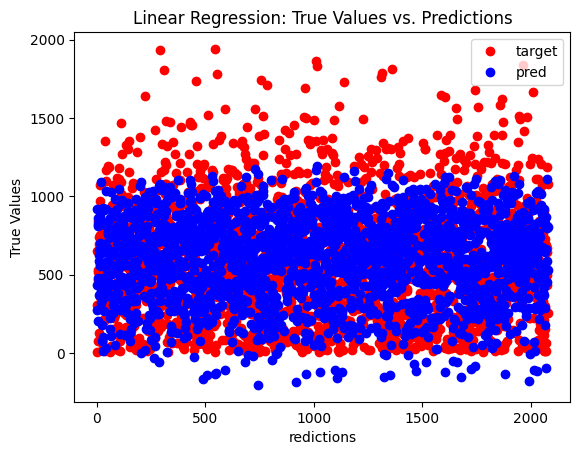

In [14]:
import matplotlib.pyplot as plt

# 실제 정답과 예측값을 그래프로 표현
plt.plot(y_test.values, 'ro', label='target')
plt.plot(y_pred, 'bo', label='pred')  # y_pred는 이미 Numpy 배열입니다.
plt.xlabel('redictions')
plt.ylabel('True Values')
plt.title('Linear Regression: True Values vs. Predictions')
plt.legend()
plt.show()

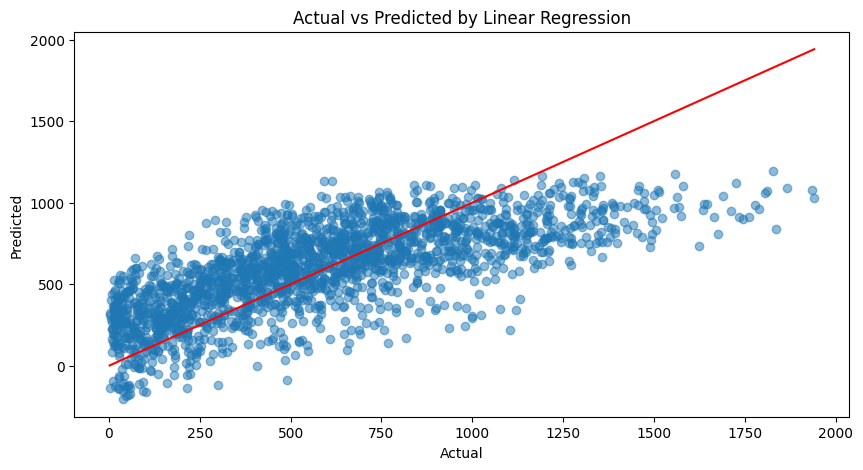

In [15]:
import matplotlib.pyplot as plt

# 실제 값과 예측값을 비교하는 그래프로 표현현.
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # 대각선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by Linear Regression')
plt.show()


### 랜덤포레스트

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

rf_model = RandomForestRegressor()
rf_params = {'random_state':[42], 'n_estimators':[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]}
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)
gridsearch_rf_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring=rmse_scorer, cv=5)

gridsearch_rf_model.fit(x_train, y_train)
print('최적 하이퍼파라미터 :', gridsearch_rf_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 950, 'random_state': 42}


In [25]:
pred = gridsearch_rf_model.best_estimator_.predict(x_train)
print(f'랜덤 포레스트 회귀 RMSE 값 : {rmse(y_train, pred):.5f}')

랜덤 포레스트 회귀 RMSE 값 : 50.34194


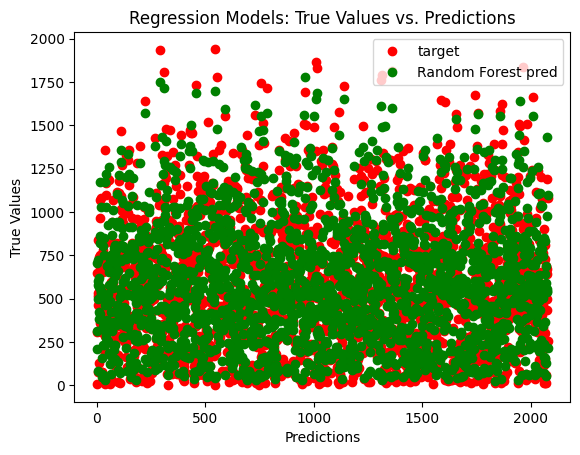

In [26]:
# 랜덤 포레스트 모델 학습
pred = gridsearch_rf_model.best_estimator_.predict(x_test)

# 랜덤 포레스트 회귀 그래프 추가
plt.plot(y_test.values, 'ro', label='target')
plt.plot(pred, 'go', label='Random Forest pred')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Regression Models: True Values vs. Predictions')
plt.legend()
plt.show()


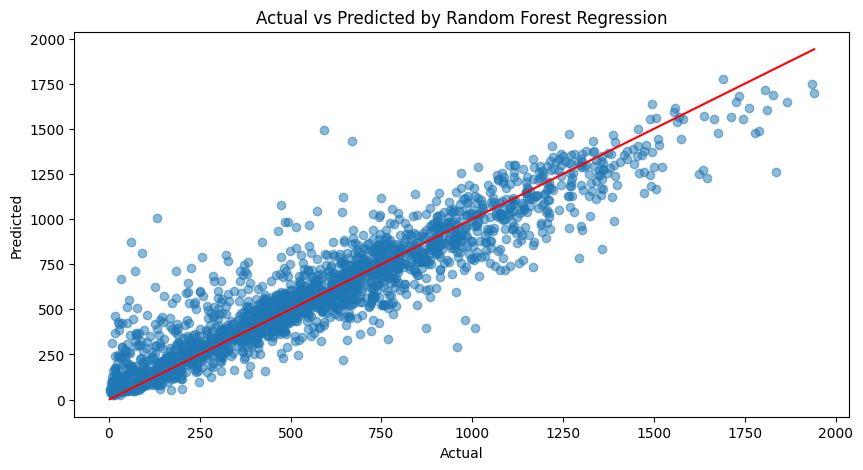

In [23]:
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델로 예측
y_pred_rf = gridsearch_rf_model.best_estimator_.predict(x_test)

# 실제 값과 예측값을 비교하는 그래프 표현
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # 대각선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted by Random Forest Regression')
plt.show()